[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Iptta-FEhkAPMMSEg3KsxKJg7o5XKEnB?usp=sharing)

#LangChain Tutorial: Building Intelligent Bakery Assistant

This notebook guides you through creating increasingly sophisticated AI applications using LangChain, from basic LLM interactions to complex agent systems. We'll develop a bakery assistant that can answer questions about products, handle conversations, and perform data analysis.

In [ ]:
!pip install -qU langchain langchain-community langchain-core langchain-openai langchain_experimental\
  langchain-text-splitters openai chromadb pymupdf pandas matplotlib

Let's start with fundamental LLM interactions. This section demonstrates different ways to communicate with an LLM, from direct calls to using structured prompts and output formats.

In [ ]:
# Import basic libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64
from typing import List, Dict, Any, Optional
from google.colab import userdata

In [ ]:
if userdata.get("LANGSMITH_API_KEY"):
  os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
  os.environ["LANGCHAIN_TRACING_V2"]="true"
  os.environ["LANGSMITH_API_KEY"] = userdata.get("LANGSMITH_API_KEY")
  os.environ["LANGSMITH_PROJECT"] = "genai-for-business-test"

In [ ]:
# Set OpenAI API key from Google Colab's user environment or default
def set_openai_api_key(default_key: str = "YOUR_API_KEY") -> None:
    """Set the OpenAI API key from Google Colab's user environment or use a default value."""

    os.environ["OPENAI_API_KEY"] = userdata.get("TT_OPENAI_KEY") or default_key


set_openai_api_key()
#set_openai_api_key("sk-...")

## SECTION 1: VANILLA LLM - Basic Language Model Usage

In this foundational section, I've explained how different interaction patterns work with language models. I've highlighted the importance of temperature settings (set to 0 for deterministic responses), the power of system messages for role prompting, and how prompt templates create reusable structures with dynamic content. The section concludes with output parsing using Pydantic models to transform free-text responses into structured data.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate

### 1.1 Direct LLM Calls

In this first section, we're working with the most basic form of LLM interaction. We initialize a ChatOpenAI model with `temperature=0` to get deterministic, focused responses. The temperature parameter controls creativity - at 0, the model produces the most likely/deterministic output, while higher values (up to 1.0) introduce more creativity and randomness.

In [ ]:
model_name = "gpt-4o-mini"
verbose= True

In [ ]:
query = "What sport-related cakes are available?"

In [ ]:
# Initialize the LLM
llm = ChatOpenAI(temperature=0, model=model_name)

# Simple direct question
response = llm.invoke(query)
print(f"Response: {response.content}")

Response: Sport-related cakes can be a fun and creative way to celebrate an event or a favorite team. Here are some popular types of sport-themed cakes:

1. **Soccer Ball Cake**: Designed to resemble a soccer ball, often made with black and white fondant or icing.

2. **Basketball Cake**: Shaped like a basketball or decorated with the orange and black pattern of a basketball.

3. **Baseball Cake**: Designed to look like a baseball, complete with red stitching, or shaped like a baseball glove.

4. **Football Cake**: Resembles an American football, often decorated with brown icing and white laces.

5. **Hockey Puck Cake**: A round cake designed to look like a hockey puck, often in black icing.

6. **Tennis Ball Cake**: Shaped like a tennis ball, usually in bright green with white lines.

7. **Golf Ball Cake**: Designed to look like a golf ball, often placed on a green cake to represent a golf course.

8. **Rugby Ball Cake**: Similar to a football cake but shaped like a rugby ball, often 

### 1.2 Message-based interaction

Here we're using a more structured approach with a system message that provides context and instructions to the model. This is a powerful technique for "role prompting" - giving the LLM a specific persona or expertise domain. The system message helps steer model responses toward specific knowledge areas without having to include those instructions in every user query.

In [ ]:
messages = [
    SystemMessage(content="You are a helpful assistant who knows about baking italian cakes."),
    HumanMessage(content=query)
]
response = llm.invoke(messages)
print(f"Response: {response.content}")

Response: Sport-related cakes can be a fun and creative way to celebrate an event or a favorite team. Here are some popular types of sport-themed cakes you might consider:

1. **Soccer Cake**: Shaped like a soccer ball or decorated with a soccer field design, often featuring the colors and logo of a favorite team.

2. **Basketball Cake**: Designed to look like a basketball or a basketball court, often with orange and black colors.

3. **Baseball Cake**: Shaped like a baseball or decorated with a baseball diamond, complete with bases and a bat.

4. **Football Cake**: Designed to resemble a football or a football field, often featuring team colors and logos.

5. **Hockey Cake**: Shaped like a hockey puck or decorated with a rink design, complete with sticks and pucks.

6. **Tennis Cake**: Designed to look like a tennis ball or a tennis court, often featuring green and yellow colors.

7. **Golf Cake**: Shaped like a golf ball or decorated with a golf course scene, including flags and club

### 1.3 Using Prompt Templates

Prompt templates introduce reusability and dynamic content. These templates let us create message structures with placeholders that can be filled in at runtime. This separation of structure from content is fundamental to building flexible LLM applications that can handle different inputs without rewriting prompt logic each time.

In [ ]:
# Create a simple prompt template
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are a bakery expert who specializes in {bakery_type}."),
    ("human", "What {topic} realted cakes are available?")
])

In [ ]:
response = prompt_template.invoke({"bakery_type": "cakes and desserts", "topic": "sport"})
print(f"\nResponse: {response}")


Response: messages=[SystemMessage(content='You are a bakery expert who specializes in cakes and desserts.', additional_kwargs={}, response_metadata={}), HumanMessage(content='What sport realted cakes are available?', additional_kwargs={}, response_metadata={})]


In [ ]:
# Format the prompt with variables
formatted_prompt = prompt_template.format_messages(
    bakery_type="italian cakes and desserts",
    topic="sport"
)

In [ ]:
# Send to the LLM
response = llm.invoke(formatted_prompt)
print(f"\nResponse: {response.content}")


Response: Sport-themed cakes can be a fun and creative way to celebrate an event or a favorite team. While I specialize in Italian cakes and desserts, I can certainly provide some ideas for sport-related cakes that can be inspired by Italian flavors or styles. Here are a few ideas:

1. **Soccer Ball Cake**: A round cake decorated to resemble a soccer ball, often made with chocolate or vanilla sponge and covered in fondant or buttercream. You can add details like grass using green icing.

2. **Basketball Cake**: A cake shaped like a basketball or a rectangular cake decorated to look like a basketball court. You can use orange fondant for the ball and add black lines for the seams.

3. **Tennis Racket and Ball Cake**: A cake shaped like a tennis racket, with a green or yellow ball made from cake pops or fondant. You can use a light sponge cake with lemon or almond flavoring for a refreshing taste.

4. **Baseball Cake**: A round cake decorated to look like a baseball, with white fondant 

The `MessagesPlaceholder` is especially useful for dynamically inserting messages, like conversation history, into prompt templates.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    MessagesPlaceholder("msgs")
])

prompt_template.invoke({"msgs": [HumanMessage(content="hi!")]})

ChatPromptValue(messages=[SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='hi!', additional_kwargs={}, response_metadata={})])

### 1.4 Using Output Parsers
Output parsers transform free-text LLM responses into structured data. By defining a schema with Pydantic, we ensure responses follow a specific format that can be easily processed by downstream code. This is critical for building reliable applications where you need to extract specific fields from LLM outputs.

In [ ]:
from langchain_core.output_parsers import JsonOutputParser
from pydantic import BaseModel, Field
from typing import List

# Define the structure we want
class BakingTips(BaseModel):
    tips: List[str] = Field(description="List of baking tips")
    difficulty: str = Field(description="Difficulty level (easy, medium, hard)")

# Create the parser
parser = JsonOutputParser(pydantic_object=BakingTips)

# Create a prompt template that instructs the model to output in the correct format
prompt_with_format = ChatPromptTemplate.from_messages([
    ("system", "You are a bakery expert. Output in JSON format."),
    ("human", "Give me 3 tips for baking a good {item}."),
    ("human", "{format_instructions}")
])

# Create a chain that combines the prompt template, LLM, and parser
chain = prompt_with_format | llm | parser

# Run the chain
result = chain.invoke({
    "item": "sports cake",
    "format_instructions": parser.get_format_instructions()
})

In [ ]:
result

{'tips': ['Use a sturdy cake recipe that can hold up to decorations and layers, such as a pound cake or a dense chocolate cake.',
  'Incorporate sports-themed decorations using fondant or edible images, and consider using colored frosting to match team colors.',
  'Ensure the cake is well-cooled before decorating to prevent melting and to achieve clean edges and details.'],
 'difficulty': 'medium'}

In [ ]:
print("Structured Output:")
print(f"Difficulty: {result['difficulty']}")
print("Tips:")
for i, tip in enumerate(result['tips'], 1):
    print(f"  {i}. {tip}")

Structured Output:
Difficulty: medium
Tips:
  1. Use a sturdy cake recipe that can hold up to decorations and layers, such as a pound cake or a dense chocolate cake.
  2. Incorporate sports-themed decorations using fondant or edible images, and consider using colored frosting to match team colors.
  3. Ensure the cake is well-cooled before decorating to prevent melting and to achieve clean edges and details.


## SECTION 2: LLM + CONTEXT = SIMPLE RAG

Now we'll enhance our LLM capabilities by adding context from external documents. This implementation of Retrieval-Augmented Generation (RAG) allows our bakery assistant to access specific product information rather than relying solely on its training data.

The RAG section includes detailed explanations about document loading, text splitting strategies, and vector embeddings. Let's see how chunk size (500 characters) and overlap (50 characters) parameters critically impact retrieval quality, and how the embedding process captures semantic meaning beyond simple keyword matching.

In [ ]:
from langchain_community.document_loaders import CSVLoader, TextLoader
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_core.runnables import RunnablePassthrough

### 2.1 Data loading

In this step, we're downloading and loading bakery-related documents (PDFs and CSV data). These will serve as the knowledge base for our assistant, containing product information that isn't necessarily part of the LLM's training data. Loading diverse document types showcases LangChain's flexibility in handling different data sources.

In [ ]:
import requests

os.makedirs('./data', exist_ok=True)

links = [
    {"url":'https://raw.githubusercontent.com/IvanReznikov/Generative-AI-Creating-a-LLM-Chatbot-for-Business/refs/heads/main/data/accessories.pdf', "name": "accessories"},
    {"url":'https://raw.githubusercontent.com/IvanReznikov/Generative-AI-Creating-a-LLM-Chatbot-for-Business/refs/heads/main/data/cupcakes.pdf', "name": "cupcakes"},
    {"url":'https://raw.githubusercontent.com/IvanReznikov/Generative-AI-Creating-a-LLM-Chatbot-for-Business/refs/heads/main/data/desserts.pdf', "name": "desserts"},
    {"url":'https://raw.githubusercontent.com/IvanReznikov/Generative-AI-Creating-a-LLM-Chatbot-for-Business/refs/heads/main/data/cakes.pdf', "name": "cakes"},
     {"url":'https://raw.githubusercontent.com/IvanReznikov/Generative-AI-Creating-a-LLM-Chatbot-for-Business/refs/heads/main/data/cake_descriptions.csv', "name": "cake_table"}
]

for link in links:

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36',
    }

    response = requests.get(
        link["url"],
        headers=headers,
    )

    if link['name'] == "cake_table":
      _path = f"./data/{link['name']}.csv"
    else:
      _path = f"./data/{link['name']}.pdf"
    with open(_path, "wb") as f:
      f.write(response.content)

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path="./data/cake_table.csv",encoding='cp1252')
table_data = loader.load()


pdf_documents = []
for pdf_link in os.listdir("./data"):
    if pdf_link[-3:] == "pdf":
      pdf_loader = PyMuPDFLoader(f"./data/{pdf_link}")
      data = pdf_loader.load()
      pdf_documents += data

In [ ]:
pdf_documents[5]

Document(metadata={'producer': 'Microsoft® Word for Microsoft 365', 'creator': 'Microsoft® Word for Microsoft 365', 'creationdate': '2025-04-22T13:22:20+04:00', 'source': './data/cakes.pdf', 'file_path': './data/cakes.pdf', 'total_pages': 8, 'format': 'PDF 1.7', 'title': '', 'author': 'Ivan Reznikov', 'subject': '', 'keywords': '', 'moddate': '2025-04-22T19:53:25+04:00', 'trapped': '', 'modDate': "D:20250422195325+04'00'", 'creationDate': "D:20250422132220+04'00'", 'page': 3}, page_content='Contains dairy, gluten, and berries. Please consume on the same day and keep at \nchilled temperatures (0-4°C). Decor may slightly vary by season. \n================================================================= \n8. ChocoCaramel Birthday Surprise (G) \nThis decadent number is crafted for those who believe birthdays should be celebrated \nwith serious chocolate. A deep chocolate cake filled with layers of gooey salted caramel \nand smooth fudge, it’s covered in a luscious dark chocolate ganache a

### 2.2 Text Splitting

Text splitting is crucial for effective RAG. Here we use a recursive approach that breaks documents into smaller chunks of 500 characters with 50-character overlap between adjacent chunks. The overlap helps maintain context across chunk boundaries, while the custom separators list helps the splitter find natural break points. These parameters significantly impact retrieval quality - too small chunks lose context, while too large chunks can bring irrelevant information.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    separators=["\n\n", "\n", ".", ","] #what other separators can you think off?
)

# Split the documents
chunks = text_splitter.split_documents(pdf_documents)
print(f"Created {len(chunks)} chunks from {len(pdf_documents)} documents")
print(f"Sample chunk: {chunks[0].page_content[:50]}...")

Created 52 chunks from 11 documents
Sample chunk: Accessories & Decor 
Edible Flower Sets 
Small box...


### 2.3 Creating Embeddings and Vector Store
Now we're converting our text chunks into numerical vectors using OpenAI's embedding model. These embeddings capture semantic meaning, allowing us to find relevant documents based on meaning rather than keyword matching. The Chroma vector store provides efficient similarity search capabilities, while the retriever abstraction simplifies accessing the most relevant documents for a query.

In [ ]:
chunks = table_data + chunks

In [ ]:
# Initialize embeddings
embeddings = OpenAIEmbeddings()

# Create a Chroma vector store
vectorstore = Chroma.from_documents(
    documents=chunks,
    embedding=embeddings
)

In [ ]:
vectorstore.similarity_search_with_score(query, k=5)

[(Document(metadata={'file_path': './data/cakes.pdf', 'source': './data/cakes.pdf', 'trapped': '', 'creator': 'Microsoft® Word for Microsoft 365', 'producer': 'Microsoft® Word for Microsoft 365', 'total_pages': 8, 'author': 'Ivan Reznikov', 'title': '', 'moddate': '2025-04-22T19:53:25+04:00', 'format': 'PDF 1.7', 'creationDate': "D:20250422132220+04'00'", 'keywords': '', 'page': 1, 'subject': '', 'creationdate': '2025-04-22T13:22:20+04:00', 'modDate': "D:20250422195325+04'00'"}, page_content='5. Goalpost Delight - Soccer Fan Cake (G) \nFor the champions of the pitch and the fans in the stands, Goalpost Delight is a playful \nand punchy cake that brings the excitement of match day to your table. Its vanilla base \nis speckled with bursts of chocolate chips, and inside hides a vibrant green mint \ncream—our own tribute to freshly cut grass.'),
  0.2796725332736969),
 (Document(metadata={'trapped': '', 'creationDate': "D:20250422132220+04'00'", 'producer': 'Microsoft® Word for Microsoft 3

In [ ]:
vectorstore.similarity_search_with_score(query, k=5, filter = {'source': './data/cakes.pdf'})

[(Document(metadata={'title': '', 'creationDate': "D:20250422132220+04'00'", 'modDate': "D:20250422195325+04'00'", 'page': 1, 'moddate': '2025-04-22T19:53:25+04:00', 'file_path': './data/cakes.pdf', 'format': 'PDF 1.7', 'subject': '', 'producer': 'Microsoft® Word for Microsoft 365', 'total_pages': 8, 'source': './data/cakes.pdf', 'keywords': '', 'author': 'Ivan Reznikov', 'creator': 'Microsoft® Word for Microsoft 365', 'creationdate': '2025-04-22T13:22:20+04:00', 'trapped': ''}, page_content='5. Goalpost Delight - Soccer Fan Cake (G) \nFor the champions of the pitch and the fans in the stands, Goalpost Delight is a playful \nand punchy cake that brings the excitement of match day to your table. Its vanilla base \nis speckled with bursts of chocolate chips, and inside hides a vibrant green mint \ncream—our own tribute to freshly cut grass.'),
  0.2796725332736969),
 (Document(metadata={'author': 'Ivan Reznikov', 'title': '', 'page': 2, 'modDate': "D:20250422195325+04'00'", 'format': 'PD

In [ ]:
# Create a retriever
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

# Test the retriever
retrieved_docs = retriever.invoke(query)
print(f"Retrieved {len(retrieved_docs)} documents for query: '{query}'")
print("="*20)
print(f"First retrieved document: {retrieved_docs[0].page_content[:200]}...")

Retrieved 3 documents for query: 'What sport-related cakes are available?'
First retrieved document: 5. Goalpost Delight - Soccer Fan Cake (G) 
For the champions of the pitch and the fans in the stands, Goalpost Delight is a playful 
and punchy cake that brings the excitement of match day to your tab...


### 2.4 Building a Simple RAG Chain
Here we've assembled a complete RAG pipeline. The chain retrieves relevant documents for a query, formats them into a context string, and includes this context in a prompt to the LLM. This approach significantly improves response quality for domain-specific questions about our bakery products. The pipeline even handles multilingual queries, demonstrating the system's flexibility.

In [ ]:
# Template for a simple RAG prompt
template = """You are an expert bakery assistant. Use the following context to answer the question.

Context:
{context}

Question: {question}

Answer:"""

# Create a prompt from the template
rag_prompt = ChatPromptTemplate.from_template(template)

# Define a function to format the retrieved documents
def format_docs(docs):
    return "\n\n".join([doc.page_content for doc in docs])

# Create a simple RAG chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
)

In [ ]:
# Test the RAG chain
response = rag_chain.invoke(query)
print(f"Question: {query}")
print(f"Response: {response.content}")

Question: What sport-related cakes are available?
Response: The available sport-related cakes are:

1. **Goalpost Delight - Soccer Fan Cake**: This cake features a vanilla base with chocolate chips and a vibrant green mint cream filling, designed to celebrate soccer fans and the excitement of match day.

2. **Trophy Cake – Champions Edition**: Shaped like a winner’s cup, this cake has a golden sponge soaked in orange blossom water and filled with whipped chocolate truffle cream. It is topped with a sugar medal and a tiny chocolate football, making it perfect for celebrating sports heroes and events. 

Both cakes are ideal for sports-themed celebrations.


In [ ]:
# Test the RAG chain
response = rag_chain.invoke("Quali torte a tema sportivo sono disponibili?")
print(f"Question: {query}")
print(f"Response: {response.content}")

Question: What sport-related cakes are available?
Response: Attualmente, le torte a tema sportivo disponibili sono:

1. **Torta "Tire Tracks"** - Questa torta è perfetta per gli amanti del motorsport, con un design che ricorda le tracce di pneumatici in cioccolato e decorazioni in foglia d'argento commestibile. È ideale per celebrazioni di gare e feste a tema.

2. **Goalpost Delight - Soccer Fan Cake** - Questa torta è dedicata ai fan del calcio, con un delicato pan di spagna alla vaniglia imbevuto di sciroppo di limoncello e una farcitura di crema di ricotta. È decorata con un piccolo pallone di cioccolato e glassa di vaniglia a forma di reti da calcio, perfetta per feste di compleanno, incontri tra tifosi o eventi della Coppa del Mondo.

Se hai bisogno di ulteriori informazioni su queste torte, non esitare a chiedere!


## SECTION 3: LLM + CONTEXT + MEMORY + THREADS
Now we'll add conversational memory, allowing our bakery assistant to remember previous interactions and maintain context across turns.


For the memory components, we'll add context about the different memory types (buffer vs. summary) and their applications. You'll see the explaination of how session management enables multi-user applications and why summary memory becomes important for longer conversations where token efficiency matters.

In [ ]:
from langchain.memory import ConversationBufferMemory, ConversationSummaryMemory, ChatMessageHistory
from langchain_core.prompts import MessagesPlaceholder
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain.chains import ConversationalRetrievalChain
import uuid

### 3.1 Basic Memory

Basic memory is implemented using `ConversationBufferMemory`, which stores the complete conversation history. This allows the assistant to understand follow-up questions (like "Does it have nuts?") by referencing previous context. The `MessagesPlaceholder` in our prompt template creates a slot where memory can be injected into the conversation.

In [ ]:
# Create a basic memory
memory = ConversationBufferMemory(return_messages=True)

# Add some messages to the memory
memory.chat_memory.add_user_message("Do you have any gluten-free cakes?")
memory.chat_memory.add_ai_message("Yes, we have several gluten-free options including our Festiva della Sicilia.")

# Create a prompt with memory
prompt_with_memory = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful bakery assistant."),
    MessagesPlaceholder(variable_name="history"),
    ("human", "{input}")
])

# Create a chain with memory
chain_with_memory = (
    {"history": lambda _: memory.load_memory_variables({})["history"], "input": RunnablePassthrough()}
    | prompt_with_memory
    | llm
)

<ipython-input-32-c14799c99517>:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(return_messages=True)


In [ ]:
# Test the chain with memory
response = chain_with_memory.invoke("Does it have nuts?")
print("Response with memory context:")
print(response.content)

Response with memory context:
Yes, the Festiva della Sicilia contains nuts. If you're looking for a gluten-free cake without nuts, please let me know, and I can suggest other options!


### 3.2 Conversation History Management

Session management is essential for multi-user applications. Here we're creating unique conversations identified by session IDs, allowing our bakery assistant to maintain separate conversations with different customers simultaneously. Each session maintains its own conversation history, preventing cross-talk between different user interactions.

In [ ]:
# Create a store for message histories
message_histories = {}

# Function to get the message history for a session
def get_session_history(session_id: str) -> ChatMessageHistory:
    if session_id not in message_histories:
        message_histories[session_id] = ChatMessageHistory()
    return message_histories[session_id]

# Create a chain with history management
conversational_chain = RunnableWithMessageHistory(
    chain_with_memory,
    get_session_history,
    input_messages_key="input",
    history_messages_key="history"
)

# Create two separate conversation sessions
session1_id = str(uuid.uuid4())
session2_id = str(uuid.uuid4())

print(f"Session 1 ID: {session1_id}")
print(f"Session 2 ID: {session2_id}")


Session 1 ID: e39b1145-e63b-4ecb-b33d-ef6fc7c2a946
Session 2 ID: 5b096a57-9796-4643-bb35-2e33b130910b


In [ ]:
# Test the first session
print("\nSession 1 Conversation:")
response = conversational_chain.invoke(
    {"input": "Do you have chocolate cakes?"},
    config={"configurable": {"session_id": session1_id}}
)
print(f"Human: Do you have chocolate cakes?")
print(f"AI: {response.content}")

print("="*20)

response = conversational_chain.invoke(
    {"input": "Which one is your most popular?"},
    config={"configurable": {"session_id": session1_id}}
)
print(f"Human: Which one is your most popular?")
print(f"AI: {response.content}")


Session 1 Conversation:
Human: Do you have chocolate cakes?
AI: Yes, we have a variety of chocolate cakes! Some popular options include classic chocolate cake, chocolate fudge cake, and chocolate lava cake. Would you like more details on any specific type?
Human: Which one is your most popular?
AI: Our most popular gluten-free cake is the Flourless Chocolate Cake. It's rich, decadent, and made with high-quality chocolate, making it a favorite among chocolate lovers. Would you like to know more about it or any other options?


In [ ]:
# Test the second session (different topic)
print("\nSession 2 Conversation:")
response = conversational_chain.invoke(
    {"input": "Do you make wedding cakes?"},
    config={"configurable": {"session_id": session2_id}}
)
print(f"Human: Do you make wedding cakes?")
print(f"AI: {response.content}")

print("="*20)

response = conversational_chain.invoke(
    {"input": "What flavors do you recommend?"},
    config={"configurable": {"session_id": session2_id}}
)
print(f"Human: What flavors do you recommend?")
print(f"AI: {response.content}")


Session 2 Conversation:
Human: Do you make wedding cakes?
AI: Yes, we do make wedding cakes! We offer a variety of designs and flavors to choose from. If you have a specific theme or flavor in mind, feel free to share, and we can help you create the perfect cake for your special day!
Human: What flavors do you recommend?
AI: We have a variety of delicious flavors for our cakes! Some popular options include:

1. **Vanilla Bean** - A classic favorite with a rich vanilla flavor.
2. **Chocolate Fudge** - Rich and decadent, perfect for chocolate lovers.
3. **Red Velvet** - A moist cake with a hint of cocoa and a beautiful red color.
4. **Lemon Zest** - Light and refreshing with a tangy lemon flavor.
5. **Carrot Cake** - Moist and spiced, often topped with cream cheese frosting.
6. **Almond Joy** - A delightful combination of chocolate and coconut.

If you're looking for gluten-free options, we can also offer gluten-free versions of many of these flavors. Let me know if you have a specific 

### 3.3 Advanced Memory Types

For longer conversations, storing every exchange becomes inefficient. Summary memory uses the LLM itself to create condensed versions of past interactions, maintaining the essential context while reducing token usage. This is particularly important for production applications where token costs and context limitations are concerns.

In [ ]:
# Create a summary memory
summary_memory = ConversationSummaryMemory(
    llm=ChatOpenAI(temperature=0, model=model_name),
    return_messages=True
)

# Add a conversation to be summarized
summary_memory.chat_memory.add_user_message("I'm planning a birthday party for 20 people.")
summary_memory.chat_memory.add_ai_message("That sounds wonderful! What kind of cake are you considering?")
summary_memory.chat_memory.add_user_message("Something with chocolate, but one of my guests has a nut allergy.")
summary_memory.chat_memory.add_ai_message("We have several nut-free chocolate cake options, including our ChocoCaramel Birthday Surprise and Chocolate Truffle cake.")
summary_memory.chat_memory.add_user_message("The ChocoCaramel Birthday Surprise sounds perfect! Can it be decorated with a birthday message?")
summary_memory.chat_memory.add_ai_message("Absolutely! We can add a personalized message on the cake at no extra charge.")

<ipython-input-37-e81b84c7ce77>:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  summary_memory = ConversationSummaryMemory(


In [ ]:
# Force the memory to predict_new_summary before loading
summary_memory.predict_new_summary(
    messages=summary_memory.chat_memory.messages,
    existing_summary=""
)

'The human is planning a birthday party for 20 people and is considering a chocolate cake, but one guest has a nut allergy. The AI suggests several nut-free chocolate cake options, including the ChocoCaramel Birthday Surprise, which the human finds perfect and asks if it can be decorated with a birthday message. The AI confirms that a personalized message can be added to the cake at no extra charge.'

### 3.4 Conversational RAG Chain

The `ConversationalRetrievalChain` combines our RAG system with conversation memory. This specialized component can interpret follow-up questions in context, maintaining the thread of conversation while bringing in relevant product information from our document store. The chain handles complex references like "the first one you mentioned," demonstrating genuine conversational intelligence.

In [ ]:
# Create a specialized conversational RAG chain
retriever_memory = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

# Use LangChain's built-in ConversationalRetrievalChain
qa_chain = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=retriever,
    memory=retriever_memory,
    verbose=True
)

In [ ]:
result = qa_chain.invoke({"question": "What other alternatives do you have?"})
print(f"Human: What cakes do you have?")
print(f"AI: {result['answer']}")



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Use the following pieces of context to answer the user's question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
Other Desserts 
Vanilla Bean Panna Cotta with Berry Compote 
Creamy, silky panna cotta infused with real vanilla bean, layered with a bright raspberry-
blueberry compote. Served in elegant glass jars for dine-in or takeaway. 
Chocolate Lava Dome 
A molten mini cake with a hard chocolate shell—crack it open to reveal flowing 
ganache. Garnished with edible gold leaf and chocolate pearls. 
Passionfruit Tartlets

Accessories & Decor 
Edible Flower Sets 
Small boxes of pressed edible flowers—violas, pansies, roses—for decorating cupcakes 
and cakes at home. Great for DIY dessert kits. 
Mini Sparkler Candles 
Birthday essentials! Small sparklers shaped like hearts, stars, or numbers—safe for 
indoor use a

In [ ]:
result = qa_chain.invoke({"question": "What is the energy content of the first one you mentioned?"})
print(f"Human: What is the energy content of the first one you mentioned?")
print(f"AI: {result['answer']}")



> Entering new LLMChain chain...
Prompt after formatting:
Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:

Human: What other alternatives do you have?
Assistant: I don't know.
Follow Up Input: What is the energy content of the first one you mentioned?
Standalone question:

> Finished chain.


> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Use the following pieces of context to answer the user's question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
or fans of bright aesthetics. 
Though high in energy (it’s a birthday after all!), it balances fruitiness with creaminess, 
ensuring no flavor overwhelms the others. A light glaze keeps the cake moist and photo-
ready throughout the party.

4°C and consume within 24 hours. 

and cultural festivals. Ea

## SECTION 4: LLM + CONTEXT + MEMORY + THREADS + AGENTS

In our final section, we'll build an LLM-powered agent system that can use tools to perform actions like searching documents, analyzing data, and executing code.

In the advanced agents section, we'll see how tools extend the assistant's capabilities beyond conversation, and how the OpenAI functions agent makes intelligent decisions about which tools to use for different tasks. The examples demonstrate the agent's ability to perform complex data analysis and visualization.

In [ ]:
from langchain.agents import AgentExecutor, create_openai_functions_agent
from langchain.tools import BaseTool, tool, StructuredTool, Tool
from langchain_experimental.utilities import PythonREPL
from langchain_experimental.agents import create_pandas_dataframe_agent
from pydantic import BaseModel, Field
import pandas as pd

### 4.1 Creating Tools

Tools give our agent capabilities beyond conversation. We've created three tools:

- `search_cake_descriptions` - Queries our vector database for bakery product information
- `csv_data_analyzer` - Uses a specialized Pandas agent to analyze numerical product data
- `python_repl` - Executes Python code for custom analysis and visualization

Each tool has a descriptive name and docstring that helps the agent understand when and how to use it.

In [ ]:
# Define the search_cake_descriptions tool
@tool
def search_cake_descriptions(query: str) -> str:
    """Search for information about cakes, desserts and accessories descriptions"""
    # In a real application, this would query a database
    # For this example, we'll use our retriever
    docs = retriever.invoke(query)
    return "\n".join([doc.page_content for doc in docs])

# Define the CSV tool using the newer approach
class CSVQueryInput(BaseModel):
    """Input for CSV query tool."""
    query: str = Field(description="The query or question about the CSV data")
    #csv_path: str = Field(description="Path to the CSV file to be analyzed") for multiple files

class CSVAgentTool(BaseTool):
    """
    Tool that uses an agent to answer questions about the following data:
    ingredients, short description, energy_kcal, weight_grams, restrictions, delivery_time_hr, availability
    """
    name: str = "csv_data_analyzer"
    description: str = "Analyze CSV data by asking questions in natural language. Input should include the query and path to CSV file."
    args_schema: type[BaseModel] = CSVQueryInput
    return_direct: bool = True

    def _run(self, query: str) -> str:
        """Run the tool."""
        try:
            # Load the CSV into a pandas DataFrame
            df = pd.read_csv("/content/data/cake_table.csv", encoding='cp1252')

            # Create a Pandas DataFrame agent
            agent = create_pandas_dataframe_agent(
                ChatOpenAI(temperature=0, model=model_name),
                df,
                verbose=True,
                agent_type="openai-functions",
                allow_dangerous_code=True
            )

            # Run the agent on the query
            result = agent.run(query)
            return result

        except Exception as e:
            return f"Error processing CSV query: {str(e)}"

    async def _arun(self, query: str) -> str:
        """Run the tool asynchronously."""
        # For simplicity in the example, we'll just call the synchronous version
        return self._run(query)

# Instantiate the CSV tool
csv_tool = CSVAgentTool()

# Create a Python REPL tool
python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    description="Execute Python code to analyze data. Input should be valid Python code.",
    func=python_repl.run
)

### 4.2 Creating an Agent

The agent combines an LLM with decision-making capabilities and tool usage. We use `create_openai_functions_agent` which leverages OpenAI's function calling capabilities for reliable tool selection. The agent_prompt establishes the agent's persona as a "bakery business analyst" and includes placeholders for chat history and the agent's working area (`scratchpad`).

In [ ]:
# List all tools - make sure to use the proper tool objects
tools = [search_cake_descriptions, csv_tool, repl_tool]

# Create an agent prompt
agent_prompt = ChatPromptTemplate.from_messages([
    ("system", """You are a bakery business analyst who helps with data analysis and insights.
    Use the tools available to search for information, create visualizations, and run Python code
    to help analyze bakery data. Always think step by step."""),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{input}"),
    MessagesPlaceholder(variable_name="agent_scratchpad")
])

# Create the agent
agent = create_openai_functions_agent(
    llm=ChatOpenAI(temperature=0, model=model_name),
    prompt=agent_prompt,
    tools=tools
)

# Create an agent executor
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
    memory=ConversationBufferMemory(memory_key="chat_history", return_messages=True)
)

### 4.3 Using the Agent

In [ ]:
# Example usage
result = agent_executor.invoke({"input": "What cakes, containing nuts larger than a kilo are available, that can be delivered less than 16 hours?"})
print("\nAgent Result:")
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `search_cake_descriptions` with `{'query': 'cakes containing nuts larger than a kilo, delivery less than 16 hours'}`


markets of Palermo where sweets and colors compete for your attention. Every slice is a 
postcard from southern Italy. 
This is a slightly heavier cake, ideal for indulgent moments or festive tables. Its distinct 
Mediterranean identity makes it a perfect centerpiece for those who crave something 
unusual and unforgettable. 
Allergy note: Includes nuts (almond and pistachio), wheat, and milk. Please store at 0-
4°C and consume within 24 hours.
Name: Hazelnut Toffee Crown
Category: G
Ingredients: Hazelnuts, caramel, praline, brown sugar sponge
Description: Dense toffee cake with rich hazelnut flavor and caramel crowns
Energy_kcal: 480
Weight_grams: 1150
Restrictions: Contains nuts, dairy, gluten
Delivery_time_hr: 48
Available: No
cream, and chunks of toffee scattered throughout, it’s a rich and nutty delight for any 
oc

In [ ]:
# Run the agent with a query
result = agent_executor.invoke({"input": "What cinema snacks can we offer?"})
print("\nAgent Result:")
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `search_cake_descriptions` with `{'query': 'cinema snacks'}`


mascarpone, and a dusting of cocoa. Perfect for dessert platters. 
Earl Grey Shortbread Cookies 
Delicate buttery cookies infused with bergamot tea and a hint of lemon zest. Pairs 
beautifully with your afternoon brew. 
Caramel Popcorn Brittle 
Thin sheets of buttery brittle laced with crunchy popcorn and sea salt. Sweet, crackly, 
and wildly addictive.
cupcake box or cake layer. Sweet and mysterious. 
Hot Chocolate Bombs 
Spherical chocolate shells filled with cocoa, marshmallows, and flavor bursts like mint 
or chili. Just drop into warm milk and watch the magic unfold.
super Instagrammable with their jade-green hue. 
Mini Fruit Pavlovas 
Crispy-on-the-outside, gooey-inside meringues topped with whipped cream and 
seasonal fruit. Think strawberries, kiwi, and dragonfruit spirals. 
Banana Split Jars 
Layered dessert jars with banana mousse, fudge sauce, strawberry cream, a

In [ ]:
# Run the agent with a query
result = agent_executor.invoke({"input": "What common ingredients do 5 least energy cake contains?"})
print("\nAgent Result:")
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `csv_data_analyzer` with `{'query': 'What are the common ingredients in the 5 least energy cakes?', 'path': 'bakery_data.csv'}`




> Entering new AgentExecutor chain...


<ipython-input-43-5189c155c3fb>:42: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = agent.run(query)



Invoking: `python_repl_ast` with `{'query': "# First, we will sort the dataframe by the 'Energy_kcal' column to find the 5 least energy cakes.\nleast_energy_cakes = df.nsmallest(5, 'Energy_kcal')\n\n# Next, we will extract the ingredients from these cakes and find the common ones.\nimport pandas as pd\nfrom collections import Counter\n\n# Split the ingredients by comma and flatten the list\ningredients_list = least_energy_cakes['Ingredients'].str.split(', ').tolist()\ningredients_flat = [ingredient for sublist in ingredients_list for ingredient in sublist]\n\n# Count the occurrences of each ingredient\ningredient_counts = Counter(ingredients_flat)\n\n# Find the common ingredients\ncommon_ingredients = ingredient_counts.most_common()\ncommon_ingredients"}`


[('mascarpone', 3), ('Ricotta', 1), ('pine nuts', 1), ('lemon zest', 1), ('vanilla', 1), ('sugar', 1), ('flour', 1), ('Coffee', 1), ('sponge', 1), ('cocoa powder', 1), ('Lemon zest', 1), ('lemon juice', 1), ('sugar glaze', 1), ('Va

In [ ]:
# Follow-up question
result = agent_executor.invoke({"input": "Which cake has the highest energy content and what is its weight?"})
print("\nFollow-up Result:")
print(result["output"])



> Entering new AgentExecutor chain...

Invoking: `csv_data_analyzer` with `{'query': 'Which cake has the highest energy content and what is its weight?', 'path': 'cakes_data.csv'}`




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "highest_energy_cake = df.loc[df['Energy_kcal'].idxmax()]\nhighest_energy_cake[['Name', 'Energy_kcal', 'Weight_grams']]"}`


Name            Hazelnut Toffee Crown
Energy_kcal                       480
Weight_grams                     1150
Name: 9, dtype: objectThe cake with the highest energy content is the "Hazelnut Toffee Crown," which has an energy content of 480 kcal and a weight of 1150 grams.

> Finished chain.
The cake with the highest energy content is the "Hazelnut Toffee Crown," which has an energy content of 480 kcal and a weight of 1150 grams.


> Finished chain.

Follow-up Result:
The cake with the highest energy content is the "Hazelnut Toffee Crown," which has an energy content of 480 kcal and a weight of 



> Entering new AgentExecutor chain...



Invoking: `python_repl` with `import matplotlib.pyplot as plt
import numpy as np

# Data for cakes
cakes = ['Hazelnut Toffee Crown', 'Chocolate Fudge Cake', 'Carrot Cake', 'Lemon Drizzle Cake', 'Red Velvet Cake']
weights = [1150, 900, 800, 750, 850]  # in grams
energy = [480, 350, 300, 400, 450]  # in kcal

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weights, energy, color='blue')

# Adding titles and labels
plt.title('Energy vs Weight of Cakes')
plt.xlabel('Weight (grams)')
plt.ylabel('Energy (kcal)')

# Adding cake names as annotations
for i, cake in enumerate(cakes):
    plt.annotate(cake, (weights[i], energy[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Show grid
plt.grid()

# Show plot
plt.show()`




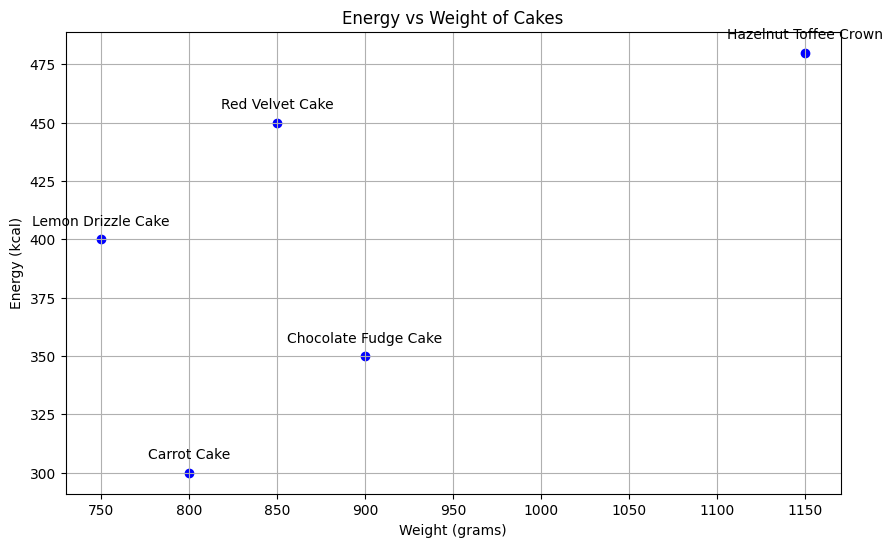

Here is the plot showing the relationship between energy content (in kcal) and weight (in grams) of various cakes. Each point represents a different cake, and the annotations indicate the names of the cakes. 

If you have any further questions or need additional analysis, feel free to ask!

> Finished chain.

Agent Result:
Here is the plot showing the relationship between energy content (in kcal) and weight (in grams) of various cakes. Each point represents a different cake, and the annotations indicate the names of the cakes. 

If you have any further questions or need additional analysis, feel free to ask!


In [ ]:
# Run the agent with a query
result = agent_executor.invoke({"input": "Draw plot with energy vs weight"})
print("\nAgent Result:")
print(result["output"])